In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import interpolate 
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc.adia_analysis import *
from toolfunc.pulse_filter import *
import scipy.optimize as sci_op
from toolfunc import DE

{'Q1_freq': '6000.0MHz', 'Q1_anhar': '-125.0MHz', 'Q2_freq': '1000.0MHz', 'Q2_anhar': '-50.0MHz', 'Q3_freq': '6200.0MHz', 'Q3_anhar': '-125.0MHz', 'g12': '73.4847MHz', 'g13': '-30.4959MHz', 'g23': '74.6994MHz'}


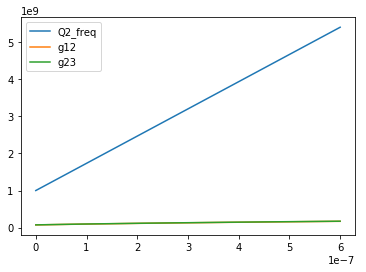

In [2]:
raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

flux_pulse = np.linspace(1,0,601)
# flux_pulse = np.linspace(8/9,0/9,6000)
freq_arr =5.4e9 -flux_pulse * (5.4e9 - 1e9)

raw_config.setValue('Q1 f01_max',6.00e9)
raw_config.setValue('Q2 f01_max',5.4e9)
raw_config.setValue('Q3 f01_max',6.2e9)
raw_config.setValue('Q1 f01_min',1e9)
raw_config.setValue('Q2 f01_min',1e9)
raw_config.setValue('Q3 f01_min',1e9)
raw_config.setValue('Q1 Ec',0.25e9)
raw_config.setValue('Q2 Ec',0.1e9)
raw_config.setValue('Q3 Ec',0.25e9)

raw_config.setValue('r12',0.03)
raw_config.setValue('r23',0.03)
raw_config.setValue('r13',-0.005)

raw_config.setValue('Q2 Voltage period',-1)
raw_config.setValue('Q2 Voltage operating point',0)
raw_config.setValue('Q2 Flux',flux_pulse)

simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.show_pulse()

NameError: name 'smooth_trace' is not defined

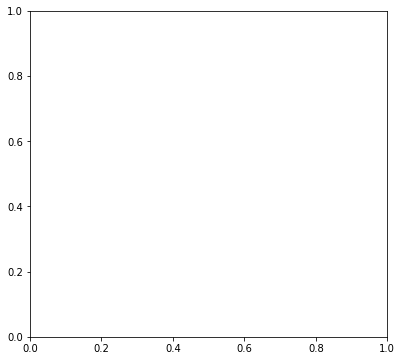

In [3]:
Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False ,sort_by_maximum_overlap=True,gap=12e6)

fig = plt.figure(figsize=[6.4,6])
ax = fig.add_subplot(111)

eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
ax.plot(freq_arr,np.abs(smooth_trace(eigen_trace))/1e6)

ax.set_yscale('log')

In [24]:
get_suppress_point(0.03,0.03,-0.005,6e9,5.8e9)

5047000000.0

## loop

In [82]:
# detuning = 200e6
# r_qq=-0.005

# coupler_freq = get_ZZ_Bspline(r_qq,detuning)

# SRATE=10e9
# gate_time_arr =[50e-9]
# raw_initial_seeds=np.array([0.7])

# for gate_time in gate_time_arr:
#     time_start = time.time()
#     DATA = sci_op.minimize(cost_func,raw_initial_seeds,args=(coupler_freq,r_qq,detuning,gate_time,SRATE), method='Nelder-Mead', options={'disp': True,'ftol':1e-5,'xtol':1e-5,'maxiter':30})

In [105]:
# detuning = 200e6
# r_qq=-0.005
detuning_arr = np.arange(20e6,301e6,10e6)
r_qq_arr = np.arange(-0.012,0,0.001)

Error_rate=np.zeros([len(detuning_arr),len(r_qq_arr)])
Error_param=np.zeros([len(detuning_arr),len(r_qq_arr)])

raw_initial_seeds=np.array([0.4])

ii=0
for detuning in detuning_arr:
    jj=0
    for r_qq in r_qq_arr:
        SRATE=10e9
        coupler_freq = get_ZZ_Bspline(r_qq,detuning)
        gate_time=50e-9
        DATA = sci_op.minimize(cost_func,raw_initial_seeds,args=(coupler_freq,r_qq,detuning,gate_time,SRATE), method='Nelder-Mead', options={'disp': True,'ftol':1e-4,'xtol':1e-4,'maxiter':20})
        Error_rate[ii,jj]=DATA.fun
        Error_param[ii,jj]=DATA.x
        
        print('detuning',detuning)
        print('r_qq',r_qq)
#         raw_initial_seeds=DATA.x
        jj+=1
    ii+=1
             

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 20000000.0
r_qq -0.012
5459850000.0
lamb1: [0.4]
error: 0.5117511340104279
5459850000.0
lamb1: [0.42]
error: 0.3808302317357374
5459850000.0
lamb1: [0.44]
error: 0.4157260604878794
5459850000.0
lamb1: [0.43]
error: 0.3177096449525294
5459850000.0
lamb1: [0.44]
error: 0.41572208647428643
5459850000.0
lamb1: [0.425]
error: 0.34834660838702325
5459850000.0
lamb1: [0.435]
error: 0.2887959008265417
5459850000.0
lamb1: [0.44]
error: 0.41572208647428643
5459850000.0
lamb1: [0.44]
error: 0.41572208647428643
5459850000.0
lamb1: [0.4325]
error: 0.29769964403127236
5459850000.0
lamb1: [0.4375]
error: 0.26924371837354544
5459850000.0
lamb1: [0.44]
error: 0.4157240734816541
5459850000.0
lamb1: [0.44]
error: 0.4157240734816541
5459850000.0
lamb1: [0.43625]
error: 0.2783772559304467
5459850000.0
lamb1: [0.

lamb1: [1.1]
error: 0.006155693067307677
5118574000.0
lamb1: [0.94]
error: 0.6273910035644248
5118574000.0
lamb1: [1.06]
error: 0.0012874138334227903
5118574000.0
lamb1: [1.1]
error: 0.006156087088606599
5118574000.0
lamb1: [1.04]
error: 0.0008490911203469231
5118574000.0
lamb1: [1.02]
error: 0.001875350185290836
5118574000.0
lamb1: [1.05]
error: 0.0008861951961948167
5118574000.0
lamb1: [1.03]
error: 0.0012075293020854527
5118574000.0
lamb1: [1.045]
error: 0.0008316487159660824
5118574000.0
lamb1: [1.05]
error: 0.0008858479068903913
5118574000.0
lamb1: [1.0425]
error: 0.000829984775990833
5118574000.0
lamb1: [1.04]
error: 0.0008490911203469231
5118574000.0
lamb1: [1.04375]
error: 0.0008296964215260827
5118574000.0
lamb1: [1.045]
error: 0.0008316487159660824
5118574000.0
lamb1: [1.043125]
error: 0.0008297512302891663
5118574000.0
lamb1: [1.044375]
error: 0.0008303009071174428
5118574000.0
lamb1: [1.0434375]
error: 0.0008300205406241989
5118574000.0
lamb1: [1.0434375]
error: 0.000830020

4101550000.0
lamb1: [0.4]
error: 0.7585759304712117
4101550000.0
lamb1: [0.42]
error: 0.7593995537780651
4101550000.0
lamb1: [0.38]
error: 0.7577787369222172
4101550000.0
lamb1: [0.36]
error: 0.7570107248057178
4101550000.0
lamb1: [0.32]
error: 0.7555717591676503
4101550000.0
lamb1: [0.28]
error: 0.7542753523112035
4101550000.0
lamb1: [0.2]
error: 0.7521583757994302
4101550000.0
lamb1: [0.12]
error: 0.7507283706312251
4101550000.0
lamb1: [-0.04]
error: 0.7500698783490566
4101550000.0
lamb1: [-0.2]
error: 0.7502000964769853
4101550000.0
lamb1: [-0.2]
error: 0.7502000964769853
4101550000.0
lamb1: [-0.12]
error: 0.7506946555649741
4101550000.0
lamb1: [0.04]
error: 0.7500246025416248
4101550000.0
lamb1: [0.12]
error: 0.7507283706312251
4101550000.0
lamb1: [7.77156117e-16]
error: 0.7499691942647011
4101550000.0
lamb1: [-0.04]
error: 0.7500698783490566
4101550000.0
lamb1: [0.02]
error: 0.7499643486717281
4101550000.0
lamb1: [0.04]
error: 0.7500246025416248
4101550000.0
lamb1: [0.01]
error: 0

lamb1: [0.46]
error: 0.5920255129752544
5119760000.0
lamb1: [0.5]
error: 0.5164752247284852
5119760000.0
lamb1: [0.54]
error: 0.40761608693990337
5119760000.0
lamb1: [0.62]
error: 0.17245277762746392
5119760000.0
lamb1: [0.7]
error: 0.07532353700142713
5119760000.0
lamb1: [0.86]
error: 0.046508835308896046
5119760000.0
lamb1: [1.02]
error: 0.050372626793231734
5119760000.0
lamb1: [1.02]
error: 0.050372626793231734
5119760000.0
lamb1: [0.94]
error: 0.023322900396501423
5119760000.0
lamb1: [1.02]
error: 0.050372626793231734
5119760000.0
lamb1: [0.9]
error: 0.009673069458656203
5119760000.0
lamb1: [0.86]
error: 0.046508835308896046
5119760000.0
lamb1: [0.92]
error: 0.028814151570168978
5119760000.0
lamb1: [0.92]
error: 0.028814151570168978
5119760000.0
lamb1: [0.88]
error: 0.006027091726275247
5119760000.0
lamb1: [0.86]
error: 0.046508835308896046
5119760000.0
lamb1: [0.86]
error: 0.046508835308896046
5119760000.0
lamb1: [0.89]
error: 0.035474527082736906
5119760000.0
lamb1: [0.89]
error:

lamb1: [0.845]
error: 0.6631931422052626
4547100000.0
lamb1: [0.835]
error: 0.6632321147472047
4547100000.0
lamb1: [0.8425]
error: 0.663198810165623
4547100000.0
lamb1: [0.8425]
error: 0.663198810165623
4547100000.0
lamb1: [0.8375]
error: 0.6631507569737174
4547100000.0
lamb1: [0.835]
error: 0.6632321147472047
4547100000.0
lamb1: [0.835]
error: 0.6632321147472047
4547100000.0
lamb1: [0.83875]
error: 0.663190071593104
4547100000.0
lamb1: [0.83875]
error: 0.663190071593104
4547100000.0
lamb1: [0.83625]
error: 0.663229403299471
4547100000.0
lamb1: [0.838125]
error: 0.6631746443709862
4547100000.0
lamb1: [0.836875]
error: 0.6631968503481243
4547100000.0
lamb1: [0.8378125]
error: 0.6631632296962748
4547100000.0
lamb1: [0.8371875]
error: 0.6631825327678744
4547100000.0
lamb1: [0.83765625]
error: 0.6631548162692791
4547100000.0
lamb1: [0.83734375]
error: 0.6631815635362723
4547100000.0
lamb1: [0.83757813]
error: 0.6631642359991583
4547100000.0
lamb1: [0.83757813]
error: 0.6631642359991583
Opt

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 40000000.0
r_qq -0.006999999999999996
5128716000.0
lamb1: [0.4]
error: 0.5533815432151474
5128716000.0
lamb1: [0.42]
error: 0.5096346452309128
5128716000.0
lamb1: [0.44]
error: 0.45799858941132987
5128716000.0
lamb1: [0.46]
error: 0.3978766686975954
5128716000.0
lamb1: [0.5]
error: 0.25311230894454195
5128716000.0
lamb1: [0.54]
error: 0.1394747570056093
5128716000.0
lamb1: [0.62]
error: 0.040646269494396314
5128716000.0
lamb1: [0.7]
error: 0.009589557640583668
5128716000.0
lamb1: [0.86]
error: 0.054400747856168774
5128716000.0
lamb1: [0.78]
error: 0.02191147237838309
5128716000.0
lamb1: [0.62]
error: 0.040646269494396314
5128716000.0
lamb1: [0.74]
error: 0.01168066867035955
5128716000.0
lamb1: [0.66]
error: 0.01843967424355153
5128716000.0
lamb1: [0.72]
error: 0.009427500700474378
5128716000

lamb1: [3.025]
error: 0.5039843981361338
4556978000.0
lamb1: [3.015]
error: 0.503728098359667
4556978000.0
lamb1: [3.01]
error: 0.5039706961753421
4556978000.0
lamb1: [3.0175]
error: 0.5035932704023403
4556978000.0
lamb1: [3.02]
error: 0.5038191914730605
4556978000.0
lamb1: [3.01625]
error: 0.5036001378232517
4556978000.0
lamb1: [3.01875]
error: 0.503678984957153
4556978000.0
lamb1: [3.016875]
error: 0.5035969276380481
4556978000.0
lamb1: [3.018125]
error: 0.5036195814844087
4556978000.0
lamb1: [3.0171875]
error: 0.5035867975847819
4556978000.0
lamb1: [3.016875]
error: 0.5035878569077358
4556978000.0
lamb1: [3.01703125]
error: 0.5035863224810049
detuning 40000000.0
r_qq -0.0029999999999999923
4108680000.0
lamb1: [0.4]
error: 0.7311008759406441
4108680000.0
lamb1: [0.42]
error: 0.7311687673893215
4108680000.0
lamb1: [0.38]
error: 0.7314174167287251
4108680000.0
lamb1: [0.41]
error: 0.731094294434895
4108680000.0
lamb1: [0.42]
error: 0.7311687673893215
4108680000.0
lamb1: [0.405]
error: 

lamb1: [0.52]
error: 0.01643050281051217
5238302000.0
lamb1: [0.49]
error: 0.006226866541500176
5238302000.0
lamb1: [0.51]
error: 0.0007262722267198374
5238302000.0
lamb1: [0.52]
error: 0.01642168943449862
5238302000.0
lamb1: [0.52]
error: 0.01643050281051217
5238302000.0
lamb1: [0.505]
error: 0.0016819529927101229
5238302000.0
lamb1: [0.515]
error: 0.006440423841972742
5238302000.0
lamb1: [0.5075]
error: 0.0008816992014052394
5238302000.0
lamb1: [0.5125]
error: 0.00045280119348978243
5238302000.0
lamb1: [0.515]
error: 0.006440423947061014
5238302000.0
lamb1: [0.515]
error: 0.006440423841972742
5238302000.0
lamb1: [0.51125]
error: 0.00070947006485933
5238302000.0
lamb1: [0.51375]
error: 0.012497787297325202
5238302000.0
lamb1: [0.511875]
error: 0.0004990388470872409
5238302000.0
lamb1: [0.513125]
error: 0.00026946974893049536
5238302000.0
lamb1: [0.51375]
error: 0.012497787297325202
5238302000.0
lamb1: [0.51375]
error: 0.012497787297325202
5238302000.0
lamb1: [0.5128125]
error: 0.00031

lamb1: [7.26]
error: 0.07664694625619306
4824730000.0
lamb1: [7.42]
error: 0.07673674990970802
4824730000.0
lamb1: [7.18]
error: 0.0766506818828685
4824730000.0
lamb1: [7.34]
error: 0.076662282671771
4824730000.0
lamb1: [7.22]
error: 0.07664322417370639
4824730000.0
lamb1: [7.18]
error: 0.0766506818828685
4824730000.0
lamb1: [7.24]
error: 0.07664698203306264
4824730000.0
lamb1: [7.24]
error: 0.07664698203306264
4824730000.0
lamb1: [7.2]
error: 0.07664907381983421
4824730000.0
lamb1: [7.23]
error: 0.07664278719052142
4824730000.0
lamb1: [7.24]
error: 0.0766469820330623
4824730000.0
lamb1: [7.225]
error: 0.07664298465242803
4824730000.0
lamb1: [7.235]
error: 0.07664709634129374
4824730000.0
lamb1: [7.2275]
error: 0.07664288066162983
detuning 50000000.0
r_qq -0.003999999999999993
4556978000.0
lamb1: [0.4]
error: 0.6883592522483989
4556978000.0
lamb1: [0.42]
error: 0.6840044576898024
4556978000.0
lamb1: [0.44]
error: 0.6812744783359348
4556978000.0
lamb1: [0.46]
error: 0.6234426789227361
4

lamb1: [0.24]
error: 0.7321803995967282
5522282000.0
lamb1: [0.32]
error: 0.7335889698433269
5522282000.0
lamb1: [0.26]
error: 0.7318843471562009
5522282000.0
lamb1: [0.24]
error: 0.7321803995967282
5522282000.0
lamb1: [0.27]
error: 0.7318954091008361
5522282000.0
lamb1: [0.25]
error: 0.7319802216181854
5522282000.0
lamb1: [0.265]
error: 0.7318763765923204
5522282000.0
lamb1: [0.27]
error: 0.7318954091008361
5522282000.0
lamb1: [0.2625]
error: 0.7318770013724987
5522282000.0
lamb1: [0.2675]
error: 0.7318825033681193
5522282000.0
lamb1: [0.26375]
error: 0.7318758468742055
5522282000.0
lamb1: [0.2625]
error: 0.7318770013724987
5522282000.0
lamb1: [0.264375]
error: 0.7318759009689955
5522282000.0
lamb1: [0.263125]
error: 0.731876213836534
5522282000.0
lamb1: [0.2640625]
error: 0.7318758212596774
5522282000.0
lamb1: [0.264375]
error: 0.7318759009689955
5522282000.0
lamb1: [0.26390625]
error: 0.7318758209051756
5522282000.0
lamb1: [0.26375]
error: 0.7318758468742055
5522282000.0
lamb1: [0.2

lamb1: [2.27875]
error: 0.12346206926477044
4833136000.0
lamb1: [2.2775]
error: 0.12347141380314208
4833136000.0
lamb1: [2.279375]
error: 0.12346340324698613
4833136000.0
lamb1: [2.278125]
error: 0.12346476668575868
4833136000.0
lamb1: [2.2790625]
error: 0.12346225143115708
4833136000.0
lamb1: [2.2784375]
error: 0.12346680657629461
4833136000.0
lamb1: [2.27890625]
error: 0.12346202852124488
detuning 60000000.0
r_qq -0.003999999999999993
4566856000.0
lamb1: [0.4]
error: 0.6040806333483391
4566856000.0
lamb1: [0.42]
error: 0.5973380080481994
4566856000.0
lamb1: [0.44]
error: 0.5912820658472693
4566856000.0
lamb1: [0.46]
error: 0.5860851883683481
4566856000.0
lamb1: [0.5]
error: 0.5775926359139143
4566856000.0
lamb1: [0.54]
error: 0.5709275616706161
4566856000.0
lamb1: [0.62]
error: 0.5614252750574813
4566856000.0
lamb1: [0.7]
error: 0.5539894678243478
4566856000.0
lamb1: [0.86]
error: 0.5394158637132406
4566856000.0
lamb1: [1.02]
error: 0.5243457494337684
4566856000.0
lamb1: [1.34]
error

lamb1: [0.32]
error: 0.03617848459013129
5318912000.0
lamb1: [0.35]
error: 0.0035295450166555886
5318912000.0
lamb1: [0.33]
error: 0.012826499430009464
5318912000.0
lamb1: [0.345]
error: 0.00029390691597674934
5318912000.0
lamb1: [0.35]
error: 0.0035295450166555886
5318912000.0
lamb1: [0.3425]
error: 0.00017637854429330968
5318912000.0
lamb1: [0.34]
error: 0.0010008657656975783
5318912000.0
lamb1: [0.34375]
error: 0.00011474596391236602
5318912000.0
lamb1: [0.345]
error: 0.00029390691597674934
5318912000.0
lamb1: [0.343125]
error: 0.0001158190696979311
5318912000.0
lamb1: [0.344375]
error: 0.0001739230326261998
5318912000.0
lamb1: [0.3434375]
error: 0.00010778457308724398
5318912000.0
lamb1: [0.343125]
error: 0.0001158190696979311
5318912000.0
lamb1: [0.34359375]
error: 0.00010938871001209272
5318912000.0
lamb1: [0.34328125]
error: 0.00010992282570854162
5318912000.0
lamb1: [0.34351563]
error: 0.00010811462841919806
Optimization terminated successfully.
         Current function value:

lamb1: [19.88]
error: 0.023379663515332827
detuning 70000000.0
r_qq -0.003999999999999993
4574800000.0
lamb1: [0.4]
error: 0.5752566893422042
4574800000.0
lamb1: [0.42]
error: 0.5698217039480478
4574800000.0
lamb1: [0.44]
error: 0.5646336748365258
4574800000.0
lamb1: [0.46]
error: 0.5600344907979702
4574800000.0
lamb1: [0.5]
error: 0.5510056371214123
4574800000.0
lamb1: [0.54]
error: 0.5422401427224561
4574800000.0
lamb1: [0.62]
error: 0.5263298690588019
4574800000.0
lamb1: [0.7]
error: 0.51240924465118
4574800000.0
lamb1: [0.86]
error: 0.49114480875689037
4574800000.0
lamb1: [1.02]
error: 0.47757842009602147
4574800000.0
lamb1: [1.34]
error: 0.46438432644552163
4574800000.0
lamb1: [1.66]
error: 0.45822852006725123
4574800000.0
lamb1: [2.3]
error: 0.4517829675838334
4574800000.0
lamb1: [2.94]
error: 0.4477987722836274
4574800000.0
lamb1: [4.22]
error: 0.43920651030241387
4574800000.0
lamb1: [5.5]
error: 0.4295884950097183
4574800000.0
lamb1: [8.06]
error: 0.41291997407452186
4574800000

lamb1: [0.35]
error: 0.007268428537814953
5248488000.0
lamb1: [0.33]
error: 0.00795471618432142
5248488000.0
lamb1: [0.345]
error: 0.0019394498187903508
5248488000.0
lamb1: [0.335]
error: 0.0019859215289578236
5248488000.0
lamb1: [0.3425]
error: 0.000655922399240727
5248488000.0
lamb1: [0.3375]
error: 0.0005006508835502244
5248488000.0
lamb1: [0.33875]
error: 3.3860766932125586e-05
5248488000.0
lamb1: [0.34125]
error: 0.0002143245120098669
5248488000.0
lamb1: [0.339375]
error: 3.4916746249114006e-05
5248488000.0
lamb1: [0.339375]
error: 3.4916746249114006e-05
5248488000.0
lamb1: [0.340625]
error: 8.64835853382484e-05
5248488000.0
lamb1: [0.3396875]
error: 2.887171981424963e-05
5248488000.0
lamb1: [0.339375]
error: 3.4916746249114006e-05
5248488000.0
lamb1: [0.33984375]
error: 2.9880883981592277e-05
5248488000.0
lamb1: [0.33953125]
error: 3.260150836814635e-05
5248488000.0
lamb1: [0.33976563]
error: 2.8907615916118345e-05
Optimization terminated successfully.
         Current function v

lamb1: [0.5]
error: 0.6898855270226502
4132576000.0
lamb1: [0.54]
error: 0.6889258516376239
4132576000.0
lamb1: [0.62]
error: 0.6874943670730054
4132576000.0
lamb1: [0.7]
error: 0.6864517916223165
4132576000.0
lamb1: [0.86]
error: 0.6847806569868863
4132576000.0
lamb1: [1.02]
error: 0.6832555389496066
4132576000.0
lamb1: [1.34]
error: 0.6795797118909968
4132576000.0
lamb1: [1.66]
error: 0.6758282813315315
4132576000.0
lamb1: [2.3]
error: 0.6693558830937144
4132576000.0
lamb1: [2.94]
error: 0.6653630209522736
4132576000.0
lamb1: [4.22]
error: 0.6608635485976817
4132576000.0
lamb1: [5.5]
error: 0.6581924262369803
4132576000.0
lamb1: [8.06]
error: 0.6550748251933066
4132576000.0
lamb1: [10.62]
error: 0.6533209697888807
4132576000.0
lamb1: [15.74]
error: 0.6513059346063725
4132576000.0
lamb1: [20.86]
error: 0.6501182804988686
4132576000.0
lamb1: [31.1]
error: 0.6487139717070909
4132576000.0
lamb1: [41.34]
error: 0.6478323205699144
4132576000.0
lamb1: [61.82]
error: 0.6468381155103025
41325

lamb1: [0.42236328]
error: 0.2503907947064251
5248488000.0
lamb1: [0.42236328]
error: 0.2503907947064251
5248488000.0
lamb1: [0.42232422]
error: 0.2813032899312874
5248488000.0
lamb1: [0.42235352]
error: 0.1449464656078845
5248488000.0
lamb1: [0.42233398]
error: 0.2215585604104643
5248488000.0
lamb1: [0.42234863]
error: 0.14586802327172455
5248488000.0
lamb1: [0.42234863]
error: 0.14586802327172455
5248488000.0
lamb1: [0.42233887]
error: 0.27839105700354805
5248488000.0
lamb1: [0.42234619]
error: 0.14579219962993428
5248488000.0
lamb1: [0.42234131]
error: 0.27906074714970686
5248488000.0
lamb1: [0.42234497]
error: 0.14398190719946724
5248488000.0
lamb1: [0.42234253]
error: 0.1438133284773765
5248488000.0
lamb1: [0.42234314]
error: 0.22265631299508504
5248488000.0
lamb1: [0.42234436]
error: 0.14286918793525216
5248488000.0
lamb1: [0.42234314]
error: 0.22265631299508504
5248488000.0
lamb1: [0.42234406]
error: 0.1411073044172848
5248488000.0
lamb1: [0.42234344]
error: 0.13814956110663945


lamb1: [107.9]
error: 0.32238294164315373
4584700000.0
lamb1: [113.02]
error: 0.32248815402309516
4584700000.0
lamb1: [105.34]
error: 0.3223778930076876
4584700000.0
lamb1: [102.78]
error: 0.32239489455609094
4584700000.0
lamb1: [106.62]
error: 0.3223773013512732
4584700000.0
lamb1: [107.9]
error: 0.3223829416431552
4584700000.0
lamb1: [105.98]
error: 0.3223768676653621
4584700000.0
lamb1: [105.34]
error: 0.3223778930076876
4584700000.0
lamb1: [106.3]
error: 0.32237689625849364
4584700000.0
lamb1: [105.66]
error: 0.3223772037117577
4584700000.0
lamb1: [106.14]
error: 0.32237683565214315
detuning 90000000.0
r_qq -0.0029999999999999923
4135038000.0
lamb1: [0.4]
error: 0.6892913376819719
4135038000.0
lamb1: [0.42]
error: 0.6883998853676645
4135038000.0
lamb1: [0.44]
error: 0.6875083270701845
4135038000.0
lamb1: [0.46]
error: 0.6866732046644823
4135038000.0
lamb1: [0.5]
error: 0.6849977421195587
4135038000.0
lamb1: [0.54]
error: 0.6831563361047045
4135038000.0
lamb1: [0.62]
error: 0.680085

5030020000.0
lamb1: [0.4]
error: 0.02428297083454989
5030020000.0
lamb1: [0.42]
error: 0.015978527785724728
5030020000.0
lamb1: [0.44]
error: 0.010396310164896727
5030020000.0
lamb1: [0.46]
error: 0.006612246722543458
5030020000.0
lamb1: [0.5]
error: 0.0031691864034775197
5030020000.0
lamb1: [0.54]
error: 0.003496346681318263
5030020000.0
lamb1: [0.54]
error: 0.003496346681318263
5030020000.0
lamb1: [0.52]
error: 0.0028376296426813052
5030020000.0
lamb1: [0.54]
error: 0.0034964036720214198
5030020000.0
lamb1: [0.51]
error: 0.00292250114353354
5030020000.0
lamb1: [0.53]
error: 0.0027729876415366617
5030020000.0
lamb1: [0.54]
error: 0.003496403672023196
5030020000.0
lamb1: [0.54]
error: 0.0034964036720214198
5030020000.0
lamb1: [0.525]
error: 0.0027818253136151494
5030020000.0
lamb1: [0.535]
error: 0.00292758956471606
5030020000.0
lamb1: [0.5275]
error: 0.0032593607425377424
5030020000.0
lamb1: [0.5275]
error: 0.0032593607425377424
5030020000.0
lamb1: [0.5325]
error: 0.002929285226325073

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 110000000.0
r_qq -0.012
5509904000.0
lamb1: [0.4]
error: 0.21103713995753637
5509904000.0
lamb1: [0.42]
error: 0.07906255927823436
5509904000.0
lamb1: [0.44]
error: 0.013379470446894026
5509904000.0
lamb1: [0.46]
error: 0.0017404942679978275
5509904000.0
lamb1: [0.5]
error: 0.0877116585146569
5509904000.0
lamb1: [0.44]
error: 0.01337947044689547
5509904000.0
lamb1: [0.48]
error: 0.03145437672824336
5509904000.0
lamb1: [0.45]
error: 0.0014323702960089557
5509904000.0
lamb1: [0.44]
error: 0.013378453997761497
5509904000.0
lamb1: [0.455]
error: 0.00018025976441460312
5509904000.0
lamb1: [0.46]
error: 0.0017404942679978275
5509904000.0
lamb1: [0.4525]
error: 0.0003712766129054801
5509904000.0
lamb1: [0.4575]
error: 0.0007806594309676118
5509904000.0
lamb1: [0.45375]
error: 0.00021454104769447202

lamb1: [0.7]
error: 0.4126925713971885
4592666000.0
lamb1: [0.86]
error: 0.3955011704999496
4592666000.0
lamb1: [1.02]
error: 0.3819591185265665
4592666000.0
lamb1: [1.34]
error: 0.3622744874233865
4592666000.0
lamb1: [1.66]
error: 0.348704819135487
4592666000.0
lamb1: [2.3]
error: 0.3313335022271193
4592666000.0
lamb1: [2.94]
error: 0.3206517074360703
4592666000.0
lamb1: [4.22]
error: 0.3096406500152412
4592666000.0
lamb1: [5.5]
error: 0.30459151732957124
4592666000.0
lamb1: [8.06]
error: 0.3003061233256782
4592666000.0
lamb1: [10.62]
error: 0.2982554352707404
4592666000.0
lamb1: [15.74]
error: 0.29502764813621485
4592666000.0
lamb1: [20.86]
error: 0.2923454237324775
4592666000.0
lamb1: [31.1]
error: 0.288460527357676
4592666000.0
lamb1: [41.34]
error: 0.28525856313073383
4592666000.0
lamb1: [61.82]
error: 0.2815770571838432
4592666000.0
lamb1: [82.3]
error: 0.27838821551694326
4592666000.0
lamb1: [123.26]
error: 0.27485610220236456
4592666000.0
lamb1: [164.22]
error: 0.27301738118279

lamb1: [0.39390625]
error: 0.6650231569653766
5347780000.0
lamb1: [0.39359375]
error: 0.6711667868252078
5347780000.0
lamb1: [0.39382813]
error: 0.5360666830212861
5347780000.0
lamb1: [0.39390625]
error: 0.6650231569653766
5347780000.0
lamb1: [0.39378906]
error: 0.5569816190815352
5347780000.0
lamb1: [0.39378906]
error: 0.5569816190815352
5347780000.0
lamb1: [0.39386719]
error: 0.6641245817146151
5347780000.0
lamb1: [0.39380859]
error: 0.5592213880534812
5347780000.0
lamb1: [0.39380859]
error: 0.5592213880534812
5347780000.0
lamb1: [0.39384766]
error: 0.6721008329901405
5347780000.0
lamb1: [0.39381836]
error: 0.5611642608164146
5347780000.0
lamb1: [0.39381836]
error: 0.5611642608164146
5347780000.0
lamb1: [0.39383789]
error: 0.6703610143138217
5347780000.0
lamb1: [0.39382324]
error: 0.5588130703460741
5347780000.0
lamb1: [0.39383301]
error: 0.6701408469355091
5347780000.0
lamb1: [0.39382568]
error: 0.669319066655826
5347780000.0
lamb1: [0.39382568]
error: 0.669319066655826
5347780000.0

lamb1: [1.4225]
error: 0.019328145550275733
4861650000.0
lamb1: [1.4275]
error: 0.01941110653323863
4861650000.0
lamb1: [1.42375]
error: 0.019315692106283366
4861650000.0
lamb1: [1.4225]
error: 0.019328145550275733
4861650000.0
lamb1: [1.424375]
error: 0.019318229228003525
4861650000.0
lamb1: [1.423125]
error: 0.0193227824433283
4861650000.0
lamb1: [1.4240625]
error: 0.019314936102884706
4861650000.0
lamb1: [1.424375]
error: 0.01931822922800286
4861650000.0
lamb1: [1.42390625]
error: 0.0193151770779042
4861650000.0
lamb1: [1.42421875]
error: 0.019317778572742972
4861650000.0
lamb1: [1.42398438]
error: 0.01931778857516442
4861650000.0
lamb1: [1.42398438]
error: 0.01931778857516442
Optimization terminated successfully.
         Current function value: 0.019315
         Iterations: 18
         Function evaluations: 38
detuning 120000000.0
r_qq -0.003999999999999993
4602588000.0
lamb1: [0.4]
error: 0.4514407919408163
4602588000.0
lamb1: [0.42]
error: 0.444538493851397
4602588000.0
lamb1: [

lamb1: [0.4537793]
error: 0.3111818122485984
5418754000.0
lamb1: [0.4537793]
error: 0.3111818122485984
5418754000.0
lamb1: [0.45379883]
error: 0.5447874595554366
5418754000.0
lamb1: [0.45378418]
error: 0.11850345840818877
5418754000.0
lamb1: [0.4537793]
error: 0.3111818122485984
5418754000.0
lamb1: [0.45378662]
error: 0.1780804722826349
5418754000.0
lamb1: [0.45378662]
error: 0.1780804722826349
5418754000.0
lamb1: [0.45378174]
error: 0.18005864541855665
5418754000.0
lamb1: [0.4537854]
error: 0.26064968209745343
5418754000.0
lamb1: [0.4537854]
error: 0.26064968209745343
5418754000.0
lamb1: [0.45378296]
error: 0.26201196160880547
5418754000.0
lamb1: [0.45378479]
error: 0.2572306185765302
5418754000.0
lamb1: [0.45378357]
error: 0.22277144866534537
5418754000.0
lamb1: [0.45378387]
error: 0.08789546768756407
5418754000.0
lamb1: [0.45378357]
error: 0.2227716706434315
5418754000.0
lamb1: [0.45378403]
error: 0.29701574580858126
5418754000.0
lamb1: [0.45378403]
error: 0.29701574580858126
detuni

lamb1: [1.02]
error: 0.02448755890905685
4871704000.0
lamb1: [1.34]
error: 0.02362727051268687
4871704000.0
lamb1: [1.66]
error: 0.017488079292942493
4871704000.0
lamb1: [2.3]
error: 0.0034612617451914574
4871704000.0
lamb1: [2.94]
error: 0.0014527612521126887
4871704000.0
lamb1: [4.22]
error: 0.018196518075064394
4871704000.0
lamb1: [2.3]
error: 0.0034612617451914574
4871704000.0
lamb1: [3.58]
error: 0.007961880007799071
4871704000.0
lamb1: [2.62]
error: 0.0010501851302913146
4871704000.0
lamb1: [2.3]
error: 0.0034612617451914574
4871704000.0
lamb1: [2.78]
error: 0.000964092635652336
4871704000.0
lamb1: [2.94]
error: 0.0014527612521126887
4871704000.0
lamb1: [2.7]
error: 0.0009107904665885957
4871704000.0
lamb1: [2.62]
error: 0.0010505969642032875
4871704000.0
lamb1: [2.74]
error: 0.0009094286513658956
4871704000.0
lamb1: [2.78]
error: 0.0009645836634142313
4871704000.0
lamb1: [2.72]
error: 0.0009042040422282405
4871704000.0
lamb1: [2.7]
error: 0.0009107904665885957
4871704000.0
lamb1

5529860000.0
lamb1: [0.4]
error: 0.38011690445776325
5529860000.0
lamb1: [0.42]
error: 0.24913010003922875
5529860000.0
lamb1: [0.44]
error: 0.041734935733993894
5529860000.0
lamb1: [0.46]
error: 0.000643064776251534
5529860000.0
lamb1: [0.5]
error: 0.01631178489623819
5529860000.0
lamb1: [0.48]
error: 0.02372438255966336
5529860000.0
lamb1: [0.44]
error: 0.041734935733993894
5529860000.0
lamb1: [0.48]
error: 0.02372438255966336
5529860000.0
lamb1: [0.47]
error: 0.005355574196784008
5529860000.0
lamb1: [0.45]
error: 0.011749624102822986
5529860000.0
lamb1: [0.465]
error: 0.0010962660466412588
5529860000.0
lamb1: [0.455]
error: 0.004094579920768671
5529860000.0
lamb1: [0.4625]
error: 0.021658196017190323
5529860000.0
lamb1: [0.4625]
error: 0.021658196017190323
5529860000.0
lamb1: [0.4575]
error: 0.005907755705431894
5529860000.0
lamb1: [0.45875]
error: 0.0010777020991356023
5529860000.0
lamb1: [0.46125]
error: 0.00040459834677986084
5529860000.0
lamb1: [0.4625]
error: 0.0216581960171903

4880176000.0
lamb1: [0.4]
error: 0.1283964241627107
4880176000.0
lamb1: [0.42]
error: 0.11536818501433388
4880176000.0
lamb1: [0.44]
error: 0.10360795716801585
4880176000.0
lamb1: [0.46]
error: 0.09336507121920667
4880176000.0
lamb1: [0.5]
error: 0.07663668656119016
4880176000.0
lamb1: [0.54]
error: 0.06399089524082069
4880176000.0
lamb1: [0.62]
error: 0.04630550875425965
4880176000.0
lamb1: [0.7]
error: 0.03263101578891192
4880176000.0
lamb1: [0.86]
error: 0.016369612495763297
4880176000.0
lamb1: [1.02]
error: 0.008753228202806884
4880176000.0
lamb1: [1.34]
error: 0.0070008672270370775
4880176000.0
lamb1: [1.66]
error: 0.015623554203550105
4880176000.0
lamb1: [1.66]
error: 0.015623554203550105
4880176000.0
lamb1: [1.18]
error: 0.006202257144427348
4880176000.0
lamb1: [1.02]
error: 0.008753228202806884
4880176000.0
lamb1: [1.26]
error: 0.006170591848594031
4880176000.0
lamb1: [1.34]
error: 0.0070008672270370775
4880176000.0
lamb1: [1.22]
error: 0.006016273664179894
4880176000.0
lamb1: 

lamb1: [0.58]
error: 0.024847591105975675
5489268000.0
lamb1: [0.55]
error: 0.0007250516110414162
5489268000.0
lamb1: [0.54]
error: 0.004091148370436337
5489268000.0
lamb1: [0.555]
error: 0.001381715114574078
5489268000.0
lamb1: [0.545]
error: 0.0017268155951161157
5489268000.0
lamb1: [0.5525]
error: 0.0008114580252166492
5489268000.0
lamb1: [0.5475]
error: 0.0009630097922181946
5489268000.0
lamb1: [0.55125]
error: 0.0007193376207358382
5489268000.0
lamb1: [0.5525]
error: 0.0008114580252166492
5489268000.0
lamb1: [0.550625]
error: 0.0007124259563032753
5489268000.0
lamb1: [0.55]
error: 0.0007250516110414162
5489268000.0
lamb1: [0.5509375]
error: 0.0007133665612824025
5489268000.0
lamb1: [0.5503125]
error: 0.0007162986297881702
5489268000.0
lamb1: [0.55078125]
error: 0.0007123636680568257
5489268000.0
lamb1: [0.5509375]
error: 0.0007134215662648602
5489268000.0
lamb1: [0.55070313]
error: 0.0007123587326594016
Optimization terminated successfully.
         Current function value: 0.00071

lamb1: [0.411875]
error: 0.03185268848826506
5066524000.0
lamb1: [0.4128125]
error: 0.03590045174813539
5066524000.0
lamb1: [0.4128125]
error: 0.03590045174813539
5066524000.0
lamb1: [0.4121875]
error: 0.032101956364475104
5066524000.0
lamb1: [0.41234375]
error: 0.030148803801420376
5066524000.0
lamb1: [0.41265625]
error: 0.03566175816757611
5066524000.0
lamb1: [0.41242187]
error: 0.0006799494439030385
5066524000.0
lamb1: [0.41257813]
error: 0.03349233076423552
5066524000.0
lamb1: [0.41246094]
error: 0.0005759320296929715
Optimization terminated successfully.
         Current function value: 0.000537
         Iterations: 10
         Function evaluations: 23
detuning 150000000.0
r_qq -0.004999999999999994
4888648000.0
lamb1: [0.4]
error: 0.11976921548927366
4888648000.0
lamb1: [0.42]
error: 0.10568285348560058
4888648000.0
lamb1: [0.44]
error: 0.09203038010324938
4888648000.0
lamb1: [0.46]
error: 0.08189263602086616
4888648000.0
lamb1: [0.5]
error: 0.06489697035667463
4888648000.0
lamb1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 160000000.0
r_qq -0.012
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 160000000.0
r_qq -0.011
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 160000000.0
r_qq -0.009999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 160000000.0
r_qq -0.008999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated succes

lamb1: [0.7]
error: 0.2757285416455
4636540000.0
lamb1: [0.86]
error: 0.2436065217884391
4636540000.0
lamb1: [1.02]
error: 0.22312213633275957
4636540000.0
lamb1: [1.34]
error: 0.20421328202932432
4636540000.0
lamb1: [1.66]
error: 0.1948824811120773
4636540000.0
lamb1: [2.3]
error: 0.18062048406187226
4636540000.0
lamb1: [2.94]
error: 0.16841153460063285
4636540000.0
lamb1: [4.22]
error: 0.15059837969861212
4636540000.0
lamb1: [5.5]
error: 0.13684345779189122
4636540000.0
lamb1: [8.06]
error: 0.11895333914549255
4636540000.0
lamb1: [10.62]
error: 0.1065153203322825
4636540000.0
lamb1: [15.74]
error: 0.09150900089675118
4636540000.0
lamb1: [20.86]
error: 0.08260185896370076
4636540000.0
lamb1: [31.1]
error: 0.07441056534140533
4636540000.0
lamb1: [41.34]
error: 0.0710665537356644
4636540000.0
lamb1: [61.82]
error: 0.06854994630217304
4636540000.0
lamb1: [82.3]
error: 0.06775523705345232
4636540000.0
lamb1: [123.26]
error: 0.06744636699464401
4636540000.0
lamb1: [164.22]
error: 0.0674265

5076688000.0
lamb1: [0.4]
error: 0.023997547469578606
5076688000.0
lamb1: [0.42]
error: 0.00675496555483035
5076688000.0
lamb1: [0.44]
error: 0.00033874463815308786
5076688000.0
lamb1: [0.46]
error: 0.0019580696388218355
5076688000.0
lamb1: [0.46]
error: 0.001959648611526088
5076688000.0
lamb1: [0.45]
error: 0.0002388386646695606
5076688000.0
lamb1: [0.46]
error: 0.0019580696388218355
5076688000.0
lamb1: [0.445]
error: 3.549008304992718e-05
5076688000.0
lamb1: [0.44]
error: 0.00033874463815308786
5076688000.0
lamb1: [0.4475]
error: 6.856351443196296e-05
5076688000.0
lamb1: [0.4425]
error: 0.00014453978697537284
5076688000.0
lamb1: [0.44625]
error: 3.0351940573769554e-05
5076688000.0
lamb1: [0.4475]
error: 6.856351443196296e-05
5076688000.0
lamb1: [0.445625]
error: 3.0894191348940225e-05
5076688000.0
lamb1: [0.446875]
error: 5.1739781445347965e-05
5076688000.0
lamb1: [0.4459375]
error: 2.999546900350758e-05
5076688000.0
lamb1: [0.445625]
error: 3.0894191349828404e-05
5076688000.0
lamb1:

5457480000.0
lamb1: [0.4]
error: 0.12249277976350459
5457480000.0
lamb1: [0.42]
error: 0.045767467021940234
5457480000.0
lamb1: [0.44]
error: 0.0032083963220553846
5457480000.0
lamb1: [0.46]
error: 0.028319252549302787
5457480000.0
lamb1: [0.46]
error: 0.028319252549302787
5457480000.0
lamb1: [0.45]
error: 0.004897766721114971
5457480000.0
lamb1: [0.43]
error: 0.018352588859524843
5457480000.0
lamb1: [0.445]
error: 0.0016449652806236337
5457480000.0
lamb1: [0.45]
error: 0.004897766721114971
5457480000.0
lamb1: [0.4425]
error: 0.0018631281709259317
5457480000.0
lamb1: [0.4475]
error: 0.0026304785270944153
5457480000.0
lamb1: [0.44375]
error: 0.0016085398510016224
5457480000.0
lamb1: [0.4425]
error: 0.0018631281709259317
5457480000.0
lamb1: [0.444375]
error: 0.001589737466968666
5457480000.0
lamb1: [0.445]
error: 0.0016449652806236337
5457480000.0
lamb1: [0.4440625]
error: 0.0015899606861528026
5457480000.0
lamb1: [0.4446875]
error: 0.001608021759148981
5457480000.0
lamb1: [0.44421875]
e

4915734000.0
lamb1: [0.4]
error: 0.25698486210761917
4915734000.0
lamb1: [0.42]
error: 0.20824563946184738
4915734000.0
lamb1: [0.44]
error: 0.1689625565932481
4915734000.0
lamb1: [0.46]
error: 0.1365504881377937
4915734000.0
lamb1: [0.5]
error: 0.09131962868565591
4915734000.0
lamb1: [0.54]
error: 0.061690320822378575
4915734000.0
lamb1: [0.62]
error: 0.02504474883672647
4915734000.0
lamb1: [0.7]
error: 0.0057158083863256826
4915734000.0
lamb1: [0.86]
error: 0.0072623938356285445
4915734000.0
lamb1: [0.78]
error: 0.0002613187126199179
4915734000.0
lamb1: [0.86]
error: 0.0072623938356285445
4915734000.0
lamb1: [0.74]
error: 0.0013836005780638594
4915734000.0
lamb1: [0.82]
error: 0.002403546250199118
4915734000.0
lamb1: [0.76]
error: 0.0003121966549258781
4915734000.0
lamb1: [0.8]
error: 0.0009933872822692758
4915734000.0
lamb1: [0.77]
error: 0.00019425501650882637
4915734000.0
lamb1: [0.76]
error: 0.0003121966549258781
4915734000.0
lamb1: [0.775]
error: 0.00020227941201911293
491573400

lamb1: [0.52]
error: 0.042944171472862225
5467820000.0
lamb1: [0.56]
error: 0.033604653783527394
5467820000.0
lamb1: [0.55]
error: 0.005377607460924638
5467820000.0
lamb1: [0.53]
error: 0.015733220519957736
5467820000.0
lamb1: [0.545]
error: 0.0007302294668363185
5467820000.0
lamb1: [0.55]
error: 0.005377607460924638
5467820000.0
lamb1: [0.5425]
error: 0.00044618448053979076
5467820000.0
lamb1: [0.54]
error: 0.001396551831436832
5467820000.0
lamb1: [0.54375]
error: 0.00042806933778305467
5467820000.0
lamb1: [0.545]
error: 0.0007302294668363185
5467820000.0
lamb1: [0.543125]
error: 0.0003978257552251785
5467820000.0
lamb1: [0.5425]
error: 0.00044618448053979076
5467820000.0
lamb1: [0.5434375]
error: 0.0004030307820820367
5467820000.0
lamb1: [0.5428125]
error: 0.00041227118843756294
5467820000.0
lamb1: [0.54328125]
error: 0.00039796052663942927
5467820000.0
lamb1: [0.54296875]
error: 0.00040260359317334515
5467820000.0
lamb1: [0.54320313]
error: 0.0003972776354191909
Optimization termina

lamb1: [2.14]
error: 0.04634061215921392
4662592000.0
lamb1: [1.98]
error: 0.04742546020305194
4662592000.0
lamb1: [2.22]
error: 0.046359769906459736
4662592000.0
lamb1: [2.06]
error: 0.0465462503842099
4662592000.0
lamb1: [2.18]
error: 0.04631823085071329
4662592000.0
lamb1: [2.22]
error: 0.046359769906456516
4662592000.0
lamb1: [2.16]
error: 0.046352496942493326
4662592000.0
lamb1: [2.16]
error: 0.046352496942493326
4662592000.0
lamb1: [2.2]
error: 0.046338344298962886
4662592000.0
lamb1: [2.19]
error: 0.04632487433492627
4662592000.0
lamb1: [2.17]
error: 0.046319652938047295
4662592000.0
lamb1: [2.175]
error: 0.0463189093364742
4662592000.0
lamb1: [2.185]
error: 0.0463144729961128
4662592000.0
lamb1: [2.19]
error: 0.04632487433493104
4662592000.0
lamb1: [2.19]
error: 0.04632487433493104
4662592000.0
lamb1: [2.1825]
error: 0.046318135367704016
4662592000.0
lamb1: [2.1875]
error: 0.046325400240609604
4662592000.0
lamb1: [2.18375]
error: 0.04631824271982066
4662592000.0
lamb1: [2.18375

lamb1: [0.5]
error: 0.5793752225339152
5104544000.0
lamb1: [0.54]
error: 0.5079565515238633
5104544000.0
lamb1: [0.62]
error: 0.2743601896908183
5104544000.0
lamb1: [0.7]
error: 0.017572430417883478
5104544000.0
lamb1: [0.86]
error: 0.09511376219032708
5104544000.0
lamb1: [0.78]
error: 0.01579289706663123
5104544000.0
lamb1: [0.86]
error: 0.09511376219032708
5104544000.0
lamb1: [0.74]
error: 0.002360548030056031
5104544000.0
lamb1: [0.7]
error: 0.017572430417883478
5104544000.0
lamb1: [0.76]
error: 0.006074483979836565
5104544000.0
lamb1: [0.72]
error: 0.005188003389606233
5104544000.0
lamb1: [0.73]
error: 0.002812735413367573
5104544000.0
lamb1: [0.75]
error: 0.003573538963927092
5104544000.0
lamb1: [0.735]
error: 0.00235296549442765
5104544000.0
lamb1: [0.73]
error: 0.002812735413367573
5104544000.0
lamb1: [0.7375]
error: 0.0023484379676054212
5104544000.0
lamb1: [0.74]
error: 0.0023617725240447918
5104544000.0
lamb1: [0.73625]
error: 0.002377841683531834
5104544000.0
lamb1: [0.73625

lamb1: [1311.1]
error: 0.26368606334352507
4250760000.0
lamb1: [1311.1]
error: 0.26368606334352596
4250760000.0
lamb1: [819.58]
error: 0.2626230751554143
4250760000.0
lamb1: [1147.26]
error: 0.2626639881663241
4250760000.0
lamb1: [901.5]
error: 0.2625597051286188
4250760000.0
lamb1: [1065.34]
error: 0.2625504281142763
4250760000.0
lamb1: [1024.38]
error: 0.2625312012644897
4250760000.0
lamb1: [942.46]
error: 0.2625391898243806
4250760000.0
lamb1: [1003.9]
error: 0.26252815198759616
detuning 200000000.0
r_qq -0.0019999999999999914
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
3367726000.0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evalu

5122236000.0
lamb1: [0.4]
error: 0.7349410871516224
5122236000.0
lamb1: [0.42]
error: 0.7325369391046781
5122236000.0
lamb1: [0.44]
error: 0.7298273587329883
5122236000.0
lamb1: [0.46]
error: 0.7267757852448721
5122236000.0
lamb1: [0.5]
error: 0.7194740332774514
5122236000.0
lamb1: [0.54]
error: 0.7102204637263684
5122236000.0
lamb1: [0.62]
error: 0.6834902835119521
5122236000.0
lamb1: [0.7]
error: 0.6394389706729782
5122236000.0
lamb1: [0.86]
error: 0.4283761828312206
5122236000.0
lamb1: [1.02]
error: 0.06210077431619543
5122236000.0
lamb1: [1.34]
error: 0.21566105426969384
5122236000.0
lamb1: [1.18]
error: 0.09240405363414961
5122236000.0
lamb1: [0.86]
error: 0.4283761828312206
5122236000.0
lamb1: [1.1]
error: 0.05903335822661315
5122236000.0
lamb1: [1.18]
error: 0.09240405363414961
5122236000.0
lamb1: [1.06]
error: 0.05560258583799538
5122236000.0
lamb1: [1.02]
error: 0.06210077431619543
5122236000.0
lamb1: [1.08]
error: 0.05599419366913616
5122236000.0
lamb1: [1.04]
error: 0.057360

lamb1: [15.74]
error: 0.29037848814508327
4265240000.0
lamb1: [20.86]
error: 0.28438623931537355
4265240000.0
lamb1: [31.1]
error: 0.27821895965695376
4265240000.0
lamb1: [41.34]
error: 0.26804763549734556
4265240000.0
lamb1: [61.82]
error: 0.2601536998362871
4265240000.0
lamb1: [82.3]
error: 0.25491102918949027
4265240000.0
lamb1: [123.26]
error: 0.24827600271373018
4265240000.0
lamb1: [164.22]
error: 0.24397011954648096
4265240000.0
lamb1: [246.14]
error: 0.23920844213057102
4265240000.0
lamb1: [328.06]
error: 0.3130696490165942
4265240000.0
lamb1: [328.06]
error: 0.3130696490165942
4265240000.0
lamb1: [205.18]
error: 0.49929465512973437
4265240000.0
lamb1: [205.18]
error: 0.49929465512973437
4265240000.0
lamb1: [287.1]
error: 0.5498294739276044
4265240000.0
lamb1: [225.66]
error: 0.23987939872987396
4265240000.0
lamb1: [266.62]
error: 0.23869952600057454
4265240000.0
lamb1: [287.1]
error: 0.5498294739276044
4265240000.0
lamb1: [287.1]
error: 0.5498294739276044
4265240000.0
lamb1: [2

lamb1: [2.13890625]
error: 0.1463561673253283
4961632000.0
lamb1: [2.1390625]
error: 0.14688980870838952
detuning 220000000.0
r_qq -0.003999999999999993
4704840000.0
lamb1: [0.4]
error: 0.7431339623086688
4704840000.0
lamb1: [0.42]
error: 0.742301900831782
4704840000.0
lamb1: [0.44]
error: 0.7414020607609075
4704840000.0
lamb1: [0.46]
error: 0.7404300343648038
4704840000.0
lamb1: [0.5]
error: 0.7382497790359966
4704840000.0
lamb1: [0.54]
error: 0.7357172077398166
4704840000.0
lamb1: [0.62]
error: 0.72937430808571
4704840000.0
lamb1: [0.7]
error: 0.7208361989622629
4704840000.0
lamb1: [0.86]
error: 0.6933284713371168
4704840000.0
lamb1: [1.02]
error: 0.6383644963122719
4704840000.0
lamb1: [1.34]
error: 0.31793758967933927
4704840000.0
lamb1: [1.66]
error: 0.23343440494765155
4704840000.0
lamb1: [2.3]
error: 0.12274419089576916
4704840000.0
lamb1: [2.94]
error: 0.04914301762536277
4704840000.0
lamb1: [4.22]
error: 0.023763776413248894
4704840000.0
lamb1: [5.5]
error: 0.059343515926130075

lamb1: [2.94]
error: 0.6909391436217165
4978708000.0
lamb1: [4.22]
error: 0.10043700469151506
4978708000.0
lamb1: [5.5]
error: 0.7749074013580872
4978708000.0
lamb1: [5.5]
error: 0.7749074013580872
4978708000.0
lamb1: [3.58]
error: 0.12605070934544937
4978708000.0
lamb1: [4.86]
error: 0.20374833168812367
4978708000.0
lamb1: [3.9]
error: 0.07435742137553758
4978708000.0
lamb1: [3.58]
error: 0.12605070934544937
4978708000.0
lamb1: [4.06]
error: 0.09237247894370926
4978708000.0
lamb1: [3.74]
error: 0.08878780181026324
4978708000.0
lamb1: [3.82]
error: 0.07408361205942482
4978708000.0
lamb1: [3.74]
error: 0.08878780181026324
4978708000.0
lamb1: [3.86]
error: 0.07423153581383335
4978708000.0
lamb1: [3.78]
error: 0.08372320898804131
4978708000.0
lamb1: [3.84]
error: 0.07666796262316344
4978708000.0
lamb1: [3.84]
error: 0.07666796262316344
4978708000.0
lamb1: [3.8]
error: 0.08104248045785267
4978708000.0
lamb1: [3.83]
error: 0.07431156481172319
4978708000.0
lamb1: [3.81]
error: 0.114848695692

lamb1: [0.12]
error: 0.00779751492515568
5540854000.0
lamb1: [0.16]
error: 0.0015018895556013767
5540854000.0
lamb1: [0.12]
error: 0.00779751492515568
5540854000.0
lamb1: [0.18]
error: 0.0014762496917742896
5540854000.0
lamb1: [0.2]
error: 0.0030192281473484517
5540854000.0
lamb1: [0.17]
error: 0.0012720473408388555
5540854000.0
lamb1: [0.16]
error: 0.0015018895556013767
5540854000.0
lamb1: [0.175]
error: 0.0013226810224388208
5540854000.0
lamb1: [0.165]
error: 0.00132985135608632
5540854000.0
lamb1: [0.1725]
error: 0.0012841600830211242
5540854000.0
lamb1: [0.1675]
error: 0.001287039433863546
5540854000.0
lamb1: [0.17125]
error: 0.001274759571723183
5540854000.0
lamb1: [0.16875]
error: 0.0012761110319551294
5540854000.0
lamb1: [0.170625]
error: 0.001272561970422803
5540854000.0
lamb1: [0.169375]
error: 0.0012732266739153841
5540854000.0
lamb1: [0.1703125]
error: 0.0012720935988256299
5540854000.0
lamb1: [0.1696875]
error: 0.001272424572265063
5540854000.0
lamb1: [0.17015625]
error: 0.

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 250000000.0
r_qq -0.007999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 250000000.0
r_qq -0.006999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 250000000.0
r_qq -0.005999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 250000000.0
r_qq -0.004999999999999994
5012860000.0
lamb1: [0.4]
error: 0.7468441719310459


lamb1: [0.38]
error: 0.7477085402699137
3803780000.0
lamb1: [0.36]
error: 0.747698561691472
3803780000.0
lamb1: [0.32]
error: 0.7476691241848638
3803780000.0
lamb1: [0.28]
error: 0.7476266596612835
3803780000.0
lamb1: [0.2]
error: 0.7475006577538446
3803780000.0
lamb1: [0.12]
error: 0.7473162391775815
3803780000.0
lamb1: [-0.04]
error: 0.7467631661230164
3803780000.0
lamb1: [-0.2]
error: 0.7459031291012639
3803780000.0
lamb1: [-0.52]
error: 0.7437460427876776
3803780000.0
lamb1: [-0.84]
error: 0.7417101304137346
3803780000.0
lamb1: [-1.48]
error: 0.738365200204341
3803780000.0
lamb1: [-2.12]
error: 0.7356627414614825
3803780000.0
lamb1: [-3.4]
error: 0.7312841831978611
3803780000.0
lamb1: [-4.68]
error: 0.7276892759500506
3803780000.0
lamb1: [-7.24]
error: 0.7217384761430513
3803780000.0
lamb1: [-9.8]
error: 0.7167926883377923
3803780000.0
lamb1: [-14.92]
error: 0.7085194744412934
3803780000.0
lamb1: [-20.04]
error: 0.7014890455412164
3803780000.0
lamb1: [-30.28]
error: 0.6896433822433

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.008999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.007999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.006999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.005999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


lamb1: [8.22]
error: 0.2823256166087611
4306936000.0
lamb1: [7.9]
error: 0.28182802826072284
4306936000.0
lamb1: [7.98]
error: 0.28183047381353876
4306936000.0
lamb1: [8.14]
error: 0.28180888598979525
4306936000.0
lamb1: [8.22]
error: 0.2823256166087611
4306936000.0
lamb1: [8.1]
error: 0.2818212008826452
4306936000.0
lamb1: [8.1]
error: 0.2818212008826452
4306936000.0
lamb1: [8.18]
error: 0.28183146135095805
4306936000.0
lamb1: [8.12]
error: 0.281842801956547
4306936000.0
lamb1: [8.12]
error: 0.281842801956547
4306936000.0
lamb1: [8.16]
error: 0.2818310116055376
4306936000.0
lamb1: [8.15]
error: 0.281808172670991
4306936000.0
lamb1: [8.16]
error: 0.2818419879804892
4306936000.0
lamb1: [8.145]
error: 0.2818196254657839
4306936000.0
lamb1: [8.145]
error: 0.2818196254657839
4306936000.0
lamb1: [8.155]
error: 0.2818100900366375
4306936000.0
lamb1: [8.1525]
error: 0.28181925620490844
4306936000.0
lamb1: [8.1475]
error: 0.28180839824483594
4306936000.0
lamb1: [8.1525]
error: 0.28181925620490

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 300000000.0
r_qq -0.009999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 300000000.0
r_qq -0.008999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 300000000.0
r_qq -0.007999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 300000000.0
r_qq -0.006999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [106]:
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\optimize_detuning\CBQ_D\Error_rate.txt',Error_rate)
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\optimize_detuning\CBQ_D\Error_param.txt',Error_param)

In [107]:
detuning_arr2 = np.arange(20e6,401e6,10e6)
r_qq_arr2 = np.arange(-0.02,-0.012,0.001)

Error_rate2=np.zeros([len(detuning_arr2),len(r_qq_arr2)])
Error_param2=np.zeros([len(detuning_arr2),len(r_qq_arr2)])

raw_initial_seeds=np.array([0.4])

ii=0
for detuning in detuning_arr2:
    jj=0
    for r_qq in r_qq_arr2:
        SRATE=10e9
        coupler_freq = get_ZZ_Bspline(r_qq,detuning)
        gate_time=50e-9
        DATA = sci_op.minimize(cost_func,raw_initial_seeds,args=(coupler_freq,r_qq,detuning,gate_time,SRATE), method='Nelder-Mead', options={'disp': True,'ftol':1e-4,'xtol':1e-4,'maxiter':20})
        Error_rate2[ii,jj]=DATA.fun
        Error_param2[ii,jj]=DATA.x
        
        print('detuning',detuning)
        print('r_qq',r_qq)
#         raw_initial_seeds=DATA.x
        jj+=1
    ii+=1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 20000000.0
r_qq -0.02
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 20000000.0
r_qq -0.019
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 20000000.0
r_qq -0.018
5858984000.0
lamb1: [0.4]
error: 0.663725782193649
5858984000.0
lamb1: [0.42]
error: 0.6581142496124293
5858984000.0
lamb1: [0.44]
error: 0.6525500809294668
5858984000.0
lamb1: [0.46]
error: 0.6470428039807713
5858984000.0
lamb1: [0.5]
error: 0.6362312842395936
5858984000.0
lamb1: [0.54]
error: 0.6257346858653476
5858984000.0
lamb1: [0.

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 30000000.0
r_qq -0.014999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 30000000.0
r_qq -0.013999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 30000000.0
r_qq -0.012999999999999994
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 40000000.0
r_qq -0.02
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization termina

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 50000000.0
r_qq -0.013999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 50000000.0
r_qq -0.012999999999999994
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 60000000.0
r_qq -0.02
5912380000.0
lamb1: [0.4]
error: 0.6330168128772347
5912380000.0
lamb1: [0.42]
error: 0.6363347689948584
5912380000.0
lamb1: [0.38]
error: 0.6300422688976066
5912380000.0
lamb1: [0.36]
error: 0.6274203255453706
5912380000.0
lamb1: [0.32]
error: 0.6232667505327671
5912380000.0
lamb1: [0.28]
error: 0.62061394

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 80000000.0
r_qq -0.015999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 80000000.0
r_qq -0.014999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 80000000.0
r_qq -0.013999999999999995
5570584000.0
lamb1: [0.4]
error: 0.025721583227518496
5570584000.0
lamb1: [0.42]
error: 0.16734955087801173
5570584000.0
lamb1: [0.38]
error: 0.025313018922605512
5570584000.0
lamb1: [0.36]
error: 0.32025665353311417
5570584000.0
lamb1: [0.36]
error: 0.32025665353314436
5570584000.0
lamb1: [

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 110000000.0
r_qq -0.019
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 110000000.0
r_qq -0.018
5871784000.0
lamb1: [0.4]
error: 0.015167865277262549
5871784000.0
lamb1: [0.42]
error: 0.013290758886514653
5871784000.0
lamb1: [0.44]
error: 0.011747549322733586
5871784000.0
lamb1: [0.46]
error: 0.01049764605582082
5871784000.0
lamb1: [0.5]
error: 0.008744886971089327
5871784000.0
lamb1: [0.54]
error: 0.007825220615066186
5871784000.0
lamb1: [0.62]
error: 0.008127450333674124
5871784000.0
lamb1: [0.58]
error: 0.0076251779437521705
5871784000.0
lamb1: [0.62]
error: 0.008127450333674124
5871784000.0
lamb1: [0.56]
error: 0.007638632876863394
58717840

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 130000000.0
r_qq -0.016999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 130000000.0
r_qq -0.015999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 130000000.0
r_qq -0.014999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 130000000.0
r_qq -0.013999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 170000000.0
r_qq -0.016999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 170000000.0
r_qq -0.015999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 170000000.0
r_qq -0.014999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 170000000.0
r_qq -0.013999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


lamb1: [0.38998779]
error: 0.09551803735491315
5804576000.0
lamb1: [0.38998901]
error: 5.2905326536678565e-05
Optimization terminated successfully.
         Current function value: 0.000053
         Iterations: 16
         Function evaluations: 39
detuning 190000000.0
r_qq -0.018
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 190000000.0
r_qq -0.016999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 190000000.0
r_qq -0.015999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 190000000.0
r_qq -0.014999999999999996
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 220000000.0
r_qq -0.014999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 220000000.0
r_qq -0.013999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 220000000.0
r_qq -0.012999999999999994
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 230000000.0
r_qq -0.02
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization ter

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.019
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.018
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.016999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 270000000.0
r_qq -0.015999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated succes

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 310000000.0
r_qq -0.014999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 310000000.0
r_qq -0.013999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 310000000.0
r_qq -0.012999999999999994
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 320000000.0
r_qq -0.02
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization ter

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 360000000.0
r_qq -0.019
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 360000000.0
r_qq -0.018
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 360000000.0
r_qq -0.016999999999999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 360000000.0
r_qq -0.015999999999999997
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated succes

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 400000000.0
r_qq -0.014999999999999996
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 400000000.0
r_qq -0.013999999999999995
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 9
         Function evaluations: 26
detuning 400000000.0
r_qq -0.012999999999999994


In [108]:
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\optimize_detuning\CBQ_D\Error_rate2.txt',Error_rate2)
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\optimize_detuning\CBQ_D\Error_param2.txt',Error_param2)

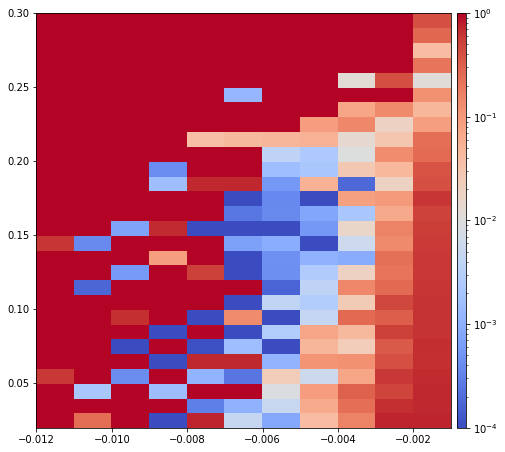

In [113]:
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib import *
fig = plt.figure(figsize=[8.0,7.2])
ax = fig.add_axes([0.15,0.10,0.72,0.8])
ax_colorbar = fig.add_axes([0.88,0.10,0.016,0.8])

detuning_arr = np.arange(20e6,301e6,10e6)
r_qq_arr = np.arange(-0.012,0,0.001)
X,Y = np.meshgrid(r_qq_arr,detuning_arr/1e9)
im = ax.pcolor(X,Y,Error_rate,cmap=cm.coolwarm,norm = LogNorm(),vmin=1e-4,vmax=1)
colarbar= plt.colorbar(im,cax=ax_colorbar)


# detuning_arr2 = np.arange(20e6,401e6,10e6)
# r_qq_arr2 = np.arange(-0.02,-0.012,0.001)
# X,Y = np.meshgrid(r_qq_arr2,detuning_arr2/1e9)
# im = ax.pcolor(X,Y,Error_rate2,cmap=cm.coolwarm,norm = LogNorm())
# colarbar= plt.colorbar(im,cax=ax_colorbar)


# ax.set_xlabel('Q1Q2detuning (GHz)',fontsize=16)
# ax.set_ylabel('Coupler Anhar (GHz)',fontsize=16)
# ax.tick_params(labelsize=16)
# plt.tick_params(labelsize=16)

In [96]:
10M

array([1.        , 1.        , 1.        , 1.        , 0.00149434,
       0.00453818, 1.        , 0.0220594 , 1.        , 1.        ,
       0.69403878, 1.        ])

array([ 0.4       ,  0.4       ,  0.4       ,  0.4       ,  0.35648438,
        0.55387367,  0.55387367,  2.29944117,  2.29944117,  2.29944117,
       14.37779484, 14.37779484])

array([1.        , 1.        , 1.        , 1.        , 0.00149434,
       0.00453818, 1.        , 0.0220594 , 1.        , 1.        ,
       0.69403878, 1.        ])

In [103]:
def cost_func(pulse_params,*args):
    coupler_freq,r_qq,detuning,gate_time,SRATE=args
    print(coupler_freq)
    if coupler_freq<3.5e9:
        return 1
    
    total_len = gate_time + 6e-9
    lamb1 = pulse_params
    Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
    Seq.clear_pulse(tips_on=False)
    Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,min_C=1e9,down_tuning=True,F_Terms=1,Lcoeff=np.array(lamb1),
                  up_limit=1,down_limit=0,
                  Q1_freq=6.0e9,CPLR_idle_freq=coupler_freq,Q2_freq=6e9+detuning,constant_coupling=False,r1c=0.03,r2c=0.03,r12=r_qq,anhar_CPLR=-100e6,
                 anhar_Q1=-250e6,anhar_Q2=-250e6,negative_amplitude=False,dfdV=coupler_freq-1e9,gap_threshold=8e6,freqpoints=401,pulsepoints=301)
    
    Seq.add_filter('Gauss Low Pass',300e6)
    flux_pulse=Seq.get_sequence()
    flux_pulse[-1]=1e-12


    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='+Z+Z+Z',sampling_rate=SRATE)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
    raw_config.setValue('Q1 f01_max',6.00e9)
    raw_config.setValue('Q2 f01_max',coupler_freq)
    raw_config.setValue('Q3 f01_max',6e9+detuning)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.1e9)
    raw_config.setValue('Q3 Ec',0.25e9)

    raw_config.setValue('r12',0.03)
    raw_config.setValue('r23',0.03)
    raw_config.setValue('r13',r_qq)
    raw_config.setValue('Q2 Voltage period',-1)
    raw_config.setValue('Q2 Voltage operating point',0)
    raw_config.setValue('Q2 Flux',flux_pulse)

    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)

    Simulator.performsimulation(solver_type=1)
    Simulator.UnitaryResult.get_U(-1)
    Simulator.UnitaryResult.get_subspace_operator(['000','001','100','101'])
    Simulator.UnitaryResult.set_Target_gate('CZ')
    Simulator.UnitaryResult.remove_single_qubit_gate()
    Simulator.UnitaryResult.get_Gate_Fidelity()
    fidelity = Simulator.UnitaryResult.Gate_Fidelity
    print('lamb1:',lamb1)
    print('error:',1-fidelity)
    
    return 1-fidelity

In [104]:
def smooth_trace(trace):
    trace_deriv = trace[1:]-trace[0:-1]
    ave_deriv = np.mean(np.abs(trace_deriv))
    smoothed_trace=np.zeros_like(trace)
    smoothed_trace[0] = trace[0]
    trace_accum = trace[0]
    for i in range(len(trace_deriv)):
        if abs(trace_deriv[i])>40*np.abs(trace_deriv[i-1]) and abs(trace_deriv[i])>0.001*ave_deriv:
            trace_deriv[i] = trace_deriv[i-1]
        trace_accum+=trace_deriv[i]
        smoothed_trace[i+1] = trace_accum
    return smoothed_trace


def get_suppress_point(r1c,r2c,r12,Q1_freq,Q2_freq):
    g12 = r12*np.sqrt(Q1_freq*Q2_freq)
    Qc_arr = np.linspace(Q1_freq-4e9,Q1_freq-40e6,361)
    geff_arr = []
    for Qc in Qc_arr:
        g1cg2c = r2c*r1c*np.sqrt(Q1_freq*Q2_freq)*Qc
        geff = g12+g1cg2c/2*(1/(Q1_freq-Qc)+1/(Q2_freq-Qc)-1/(Q1_freq+Qc)-1/(Q2_freq+Qc)   )
        geff_arr.append(geff)
    geff_arr= np.array(geff_arr)
    return Qc_arr[np.argmin( np.abs(geff_arr))]

def get_ZZ_Bspline(r_qq,detuning):
    SRATE=6e9
    q2_freq = 6e9+detuning
    coupler_freq = get_suppress_point(0.03,0.03,r_qq,6e9,q2_freq)

    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='+Z+Z+Z',sampling_rate=SRATE)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
    raw_config.setValue('Q1 f01_max',6e9)
    raw_config.setValue('Q2 f01_max',coupler_freq+200e6)
    raw_config.setValue('Q3 f01_max',q2_freq)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',100e6)
    raw_config.setValue('Q3 Ec',0.25e9)
    raw_config.setValue('r12',0.03)
    raw_config.setValue('r23',0.03)
    raw_config.setValue('r13',r_qq)
    raw_config.setValue('Q2 Voltage period',-1)
    raw_config.setValue('Q2 Voltage operating point',0.00)
    flux_pulse = np.linspace(0.8,0,401)
    raw_config.setValue('Q2 Flux',flux_pulse)
    
    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)

    Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False ,sort_by_maximum_overlap=True,gap=16e6)
    ZZ_trace = smooth_trace( Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000') )
    
    for i in range(len(ZZ_trace)):
        if np.abs(ZZ_trace[i])<50e3:
            return coupler_freq+200e6 - flux_pulse[i]*(coupler_freq+200e6-1e9)
    return 0